In [1]:
%load_ext autoreload
%autoreload
from number_statistics import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Section 1: Basic info a preliminary work</h1>
### Shows a histogram of the distribution of followers per user
Its purpose is to decide on the type of data structure would be best to use for saving the list of accounts in order

In [2]:
count = count()
follows = count.keys() # x
frequency = count.values() # y

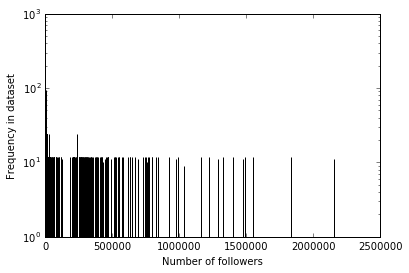

In [3]:
# Plots a simple histogram showing the frequency of pictures that have a certain number of follows
plt.bar(follows, frequency, log=True)
plt.xlabel('Number of followers')
plt.ylabel('Frequency in dataset')


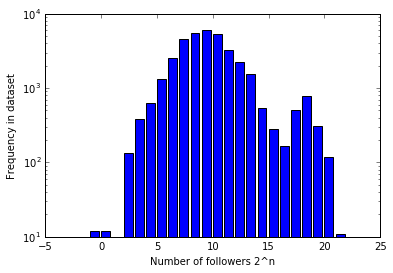

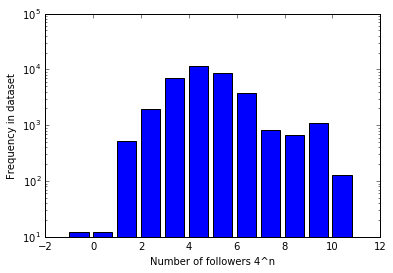

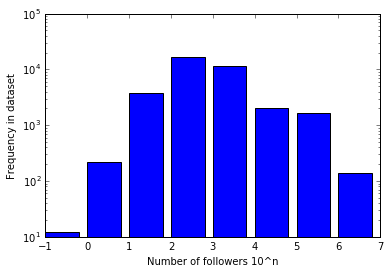

In [4]:
# Plots a histogram which tells you the distribution of followers based on a certain power
# Note: the -1 in the graphs denote 0 followers
powers = [2,4,10]

for i, power in enumerate(powers, start=1):
    count_powers = magnitude_of_scale(count, base=power)
    follows = count_powers.keys() # x
    frequency = count_powers.values() # y
    
    plt.figure(i)
    plt.bar(follows, frequency, log=True)
    xlabel = 'Number of followers %d^n' % power
    plt.xlabel(xlabel)
    plt.ylabel('Frequency in dataset')
plt.show()

# Section 2 - Test method 1: Histogram equalization
### Histogram equalization
Wikipedia entries, see:
 - https://en.wikipedia.org/wiki/Histogram_equalization
 - https://en.wikipedia.org/wiki/Histogram_matching

In [5]:
# Returns a dictionary similar to count but with a linear cdf (histogram equalization)
hist_match_count = histogram_matching(count, cdf='linear')

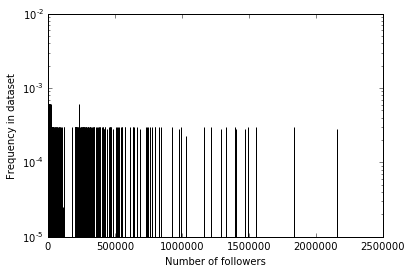

In [6]:
follows = hist_match_count.keys() # x
frequency = hist_match_count.values() # y
# Plots a simple histogram showing the frequency of pictures that have a certain number of follows
plt.bar(follows, frequency, log=True)
plt.xlabel('Number of followers')
plt.ylabel('Frequency in dataset')

### Notes on histogram equalization:
 - Very useful for making the distribution uniformish
 - Works well here but would be better for a **perfect** log normal distribution
 - This will work to compute buckets in presorting (see [1]) but will result in noisy cuttoffs (see table below)

| Using:             | Bucket 1  | Bucket 2  |
| ------------------ | --------- | --------- |
| Other method       | 100 - 200 | 200 - 300 |
| Hist Eqaualization | 100 - 230 | 175 - 300 |

 
 [1] File in: deep/instagram_spider/instagram_spider/spiders/presorting/table.py

# Section 3 - Test method 2: Equal splits

### Steps
- For each range of a power (eg 10^3-10^4) count the total frequency in that range. (=freq)
- Divide that number by the desired number of elements in each bucket (eg. 100). (=bucket_size)
- For that range create the needed amount of buckets (freq/bucket_size) all equally spaced
    - ** *Todo* ** Test: linear space and log space if linear is not good enough (4^n in this example)

In [10]:
# TODO - Automate getting ranges
#      - Get this ranges to work for log space (check one of the comments below, 
#        change that line and put it inside the j/num_buckets loop)
#      - Finish plots

import math
# use int(math.ceil()) for number of buckets

powers = [2,4,10]
bucket_size = 100

for i, power in enumerate(powers, start=1):
    # Get the stats for a certain power
    count_powers = magnitude_of_scale(count, base=power)
  

    # Create the bins
    bucket_ranges = [0]
    for key in count_powers.keys():
        num_buckets = math.ceil(count_powers[key] / bucket_size)
        bucket_len = (power**(key+1)-1 - power**key)/max(num_buckets,1) # change this for log space
        #print 'Key', key, ', pow', power**key, ', num buckets', num_buckets, ', bucket len', bucket_len
        for j in range(int(num_buckets)):
            '''
            print 'Bucket'
            print (power**key + j*bucket_len)
            print int(power**key + j*bucket_len)
            '''
            bucket_ranges.append(int(power**key + j*bucket_len))
    
    # The following prints out the highest value for each bucket (values between bucket_ranges[i+1] and 
    # bucket_ranges[i]) as well as the length of each bucket (eg 101-125 is length 25)
    ##print '\n\n\n\nbucket_ranges', bucket_ranges, '\n'
    ##print [bucket_ranges[i+1]-bucket_ranges[i] for i in range(len(bucket_ranges)-1)]
    
    # Place original count into new bucket ranges
    buckets = {}
    for key in count.keys():
        # Note: could use binary search for faster results here
        index_of_bucket = 0
        while (index_of_bucket < len(bucket_ranges)-1) and (key > bucket_ranges[index_of_bucket]):
            index_of_bucket += 1
        buckets[index_of_bucket] = buckets.get(index_of_bucket, 0) + count[key]
    ##print '\nbuckets', buckets
    ##print '\nbucket lengths', buckets.values()
    ##print '\nsorted bucket lengths', sorted(buckets.values())
    
    '''
    # TODO: finish the plots
    # plot results
    plt.figure(i)
    plt.bar(follows, frequency, log=True)
    xlabel = 'Number of followers %d^n' % power
    plt.xlabel(xlabel)
    plt.ylabel('Frequency in dataset')
    '''
#plt.show()